In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
gdp_csv = 'GDP.csv'
debt_csv = 'debt.csv'

gdp = pd.read_csv(gdp_csv)
debt = pd.read_csv(debt_csv)

In [7]:
debt.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '1995Q1 [YR1995Q1]', '1995Q2 [YR1995Q2]', '1995Q3 [YR1995Q3]',
       '1995Q4 [YR1995Q4]', '1996Q1 [YR1996Q1]', '1996Q2 [YR1996Q2]',
       ...
       '2017Q3 [YR2017Q3]', '2017Q4 [YR2017Q4]', '2018Q1 [YR2018Q1]',
       '2018Q2 [YR2018Q2]', '2018Q3 [YR2018Q3]', '2018Q4 [YR2018Q4]',
       '2019Q1 [YR2019Q1]', '2019Q2 [YR2019Q2]', '2019Q3 [YR2019Q3]',
       '2019Q4 [YR2019Q4]'],
      dtype='object', length=104)

1.- Preprocess the public debt file to obtain a data frame with country, type of debt, date
and amount of debt.

In [8]:
columns_to_melt = debt.columns[4:]

df_long = debt.melt(id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], 
                       value_vars=columns_to_melt,
                       var_name='Quarter_Year',
                       value_name='Debt_Amount')

df_long['Year'] = df_long['Quarter_Year'].str.extract(r'(\d{4})')

df_long['Debt_Amount'] = pd.to_numeric(df_long['Debt_Amount'], errors='coerce')
df_long['Date'] = df_long['Year']
df_long.drop(columns=['Quarter_Year', 'Year'], inplace=True)

df_long.head()

,Country Name,Country Code,Series Name,Series Code,Debt_Amount,Date
0,Albania,ALB,Gross PSD - Total - All maturities - All instr...,DP.DOD.DECD.CR.PS.CD,NaN,1995
1,Albania,ALB,Gross PSD - Total - All maturities - All instr...,DP.DOD.DECN.CR.PS.CD,NaN,1995
2,Albania,ALB,Gross PSD - Total - All maturities - All instr...,DP.DOD.DECX.CR.PS.CD,NaN,1995
3,Albania,ALB,Gross PSD - Total - All maturities - All instr...,DP.DOD.DECF.CR.PS.CD,NaN,1995
4,Albania,ALB,Gross PSD - Total - All maturities - All instr...,DP.DOD.DECT.CR.PS.CD,NaN,1995


2.- Create a function that receives a country and a date and returns a dictionary with the
total internal, external, local currency, foreign currency, short term and long term debt of
that country on that date.

In [9]:
def get_debt_summary(df, country, date):
    df_filtered = df[(df['Country Name'] == country) & (df['Date'] == date)]
    
    if df_filtered.empty:
        return {
            'internal': 0.0,
            'external': 0.0,
            'local_currency': 0.0,
            'foreign_currency': 0.0,
            'short_term': 0.0,
            'long_term': 0.0
        }
    
    debt_types = df_filtered['Series Name'].unique()
    
    debt_summary = {
        'internal': 0.0,
        'external': 0.0,
        'local_currency': 0.0,
        'foreign_currency': 0.0,
        'short_term': 0.0,
        'long_term': 0.0
    }
    
    for debt_type in debt_types:
        if 'internal' in debt_type.lower():
            debt_summary['internal'] += df_filtered[df_filtered['Series Name'] == debt_type]['Debt_Amount'].sum()
        elif 'external' in debt_type.lower():
            debt_summary['external'] += df_filtered[df_filtered['Series Name'] == debt_type]['Debt_Amount'].sum()
        elif 'local currency' in debt_type.lower():
            debt_summary['local_currency'] += df_filtered[df_filtered['Series Name'] == debt_type]['Debt_Amount'].sum()
        elif 'foreign currency' in debt_type.lower():
            debt_summary['foreign_currency'] += df_filtered[df_filtered['Series Name'] == debt_type]['Debt_Amount'].sum()
        elif 'short term' in debt_type.lower():
            debt_summary['short_term'] += df_filtered[df_filtered['Series Name'] == debt_type]['Debt_Amount'].sum()
        elif 'long term' in debt_type.lower():
            debt_summary['long_term'] += df_filtered[df_filtered['Series Name'] == debt_type]['Debt_Amount'].sum()
    
    return debt_summary

# Example usage
country = 'Albania'
date = '2017'
result = get_debt_summary(df_long, country, date)
print(result)


{'internal': 0.0, 'external': 16087688881.47312, 'local_currency': 0.0, 'foreign_currency': 20831407388.092712, 'short_term': 0.0, 'long_term': 0.0}


3.- Create a function that receives a type of debt and a date, and returns a dictionary with
the debt of that type for all countries on that date.

In [10]:
def get_debt_by_type_and_date(df, debt_type, date):
    df_filtered = df[(df['Series Name'].str.contains(debt_type, case=False)) & (df['Date'] == date)]

    if df_filtered.empty:
        return {}
    
    debt_by_country = df_filtered.set_index('Country Name')['Debt_Amount'].to_dict()
    
    return debt_by_country

# Example usage
debt_type = 'external'
date = '2017'
result = get_debt_by_type_and_date(df_long, debt_type, date)
print(result)

{'Albania': 4279543169.16312, 'Argentina': nan, 'Armenia': nan, 'Australia': 304317780000.0, 'Austria': nan, 'Bangladesh': 41503170141.3712, 'Barbados': nan, 'Belgium': nan, 'Bolivia': nan, 'Bosnia and Herzegovina': nan, 'Brazil': nan, 'Bulgaria': nan, 'Canada': 518517635778.12, 'Chile': nan, 'China': nan, 'Colombia': nan, 'Congo - Dem. Rep.': nan, 'Costa Rica': nan, "Cote d'Ivoire": 10769129661.9956, 'Croatia': nan, 'Cyprus': nan, 'Czech Republic': nan, 'Denmark': nan, 'Dominican Republic': nan, 'El Salvador': 9675320000.0, 'Estonia': nan, 'Fiji': nan, 'Finland': nan, 'France': nan, 'Georgia': 7056242767.87149, 'Germany': nan, 'Greece': nan, 'Guatemala': 8184368749.60908, 'Honduras': 7148300000.0, 'Hungary': nan, 'Iceland': nan, 'Indonesia': 218724604174554.0, 'Ireland': nan, 'Israel': nan, 'Italy': nan, 'Japan': nan, 'Kenya': 21967605828866.0, 'Korea - Rep.': 108078476814.0, 'Kosovo': nan, 'Kyrgyz Republic': nan, 'Latvia': nan, 'Lebanon': nan, 'Lesotho': nan, 'Lithuania': nan, 'Luxem

4.- Create a function that receives a country and a date and draws a pie chart with the
internal debt and external debt of that country on that date.

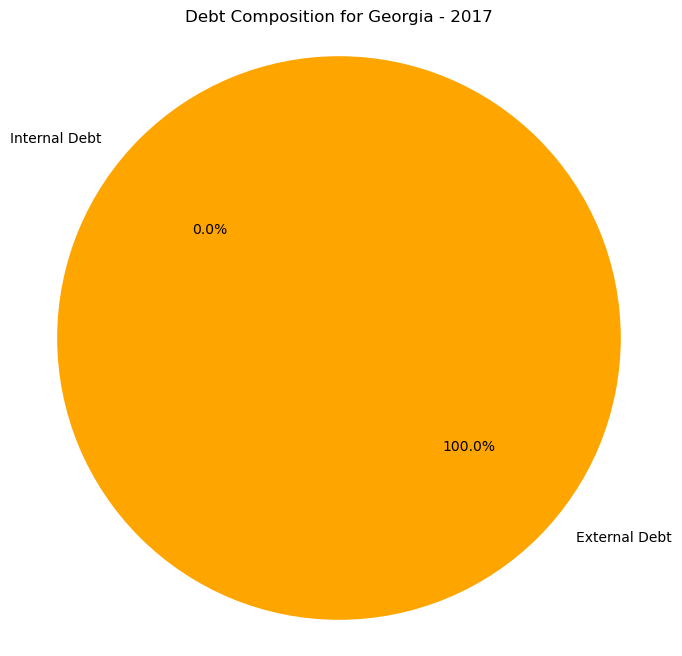

In [11]:
def plot_debt_pie_chart(df, country, date):
    df_filtered = df[(df['Country Name'] == country) & (df['Date'] == date)]
    
    internal_debt = df_filtered[df_filtered['Series Name'].str.contains('internal', case=False)]['Debt_Amount'].sum()
    external_debt = df_filtered[df_filtered['Series Name'].str.contains('external', case=False)]['Debt_Amount'].sum()

    debt_types = ['Internal Debt', 'External Debt']
    debt_values = [internal_debt, external_debt]

    plt.figure(figsize=(8, 8))
    plt.pie(debt_values, labels=debt_types, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
    plt.title(f'Debt Composition for {country} - {date}')
    plt.axis('equal')
    plt.show()

country = 'Georgia'
date = '2017'
plot_debt_pie_chart(df_long, country, date)

5.- Create a function that receives a country and a date, and draws a bar chart with the
amounts of the different types of debts of that country on that date.

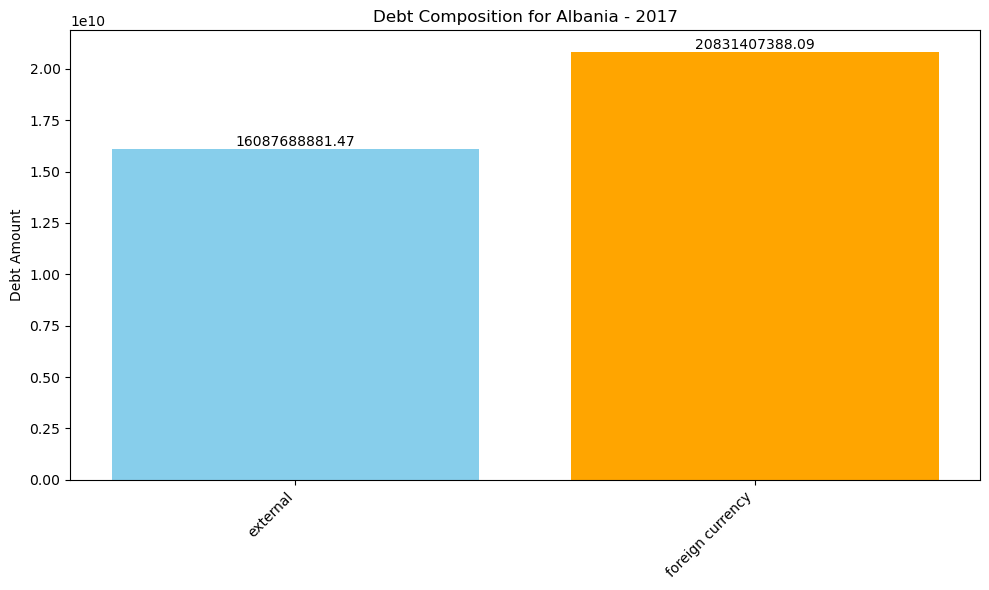

In [12]:
import matplotlib.pyplot as plt

def plot_debt_bar_chart(df, country, date):
    df_filtered = df[(df['Country Name'] == country) & (df['Date'] == date)]

    debt_types = ['internal', 'external', 'local currency', 'foreign currency', 'short term', 'long term']
    debt_amounts = {debt_type: df_filtered[df_filtered['Series Name'].str.contains(debt_type, case=False)]['Debt_Amount'].sum() for debt_type in debt_types}

    debt_amounts = {k: v for k, v in debt_amounts.items() if v > 0}
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(debt_amounts.keys(), debt_amounts.values(), color=['skyblue', 'orange', 'green', 'purple', 'pink', 'brown'])
    
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, 
                 f'{bar.get_height():.2f}', ha='center', va='bottom')
    
    plt.ylabel('Debt Amount')
    plt.title(f'Debt Composition for {country} - {date}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage
country = 'Albania'
date = '2017'
plot_debt_bar_chart(df_long, country, date)


6.- Create a function that receives a list of countries and a type of debt and draws a line
chart showing the evolution of that type of debt for those countries (one line per country).

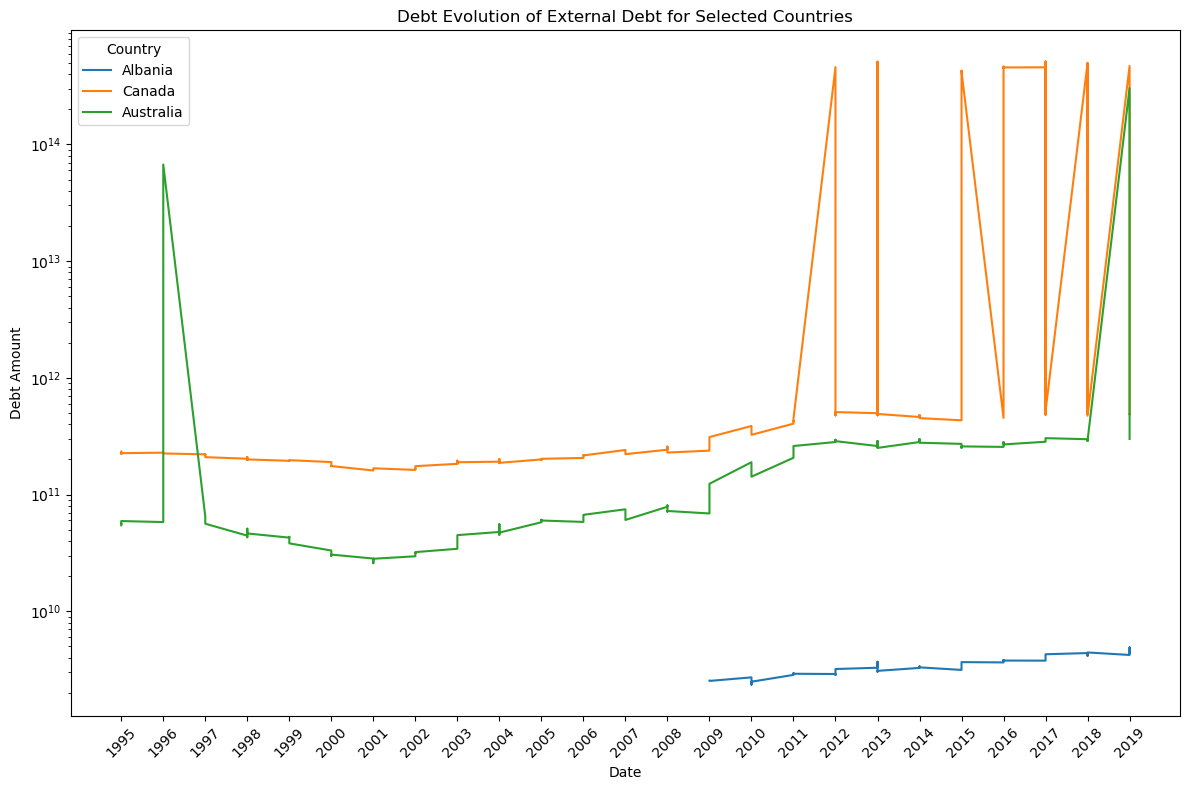

In [13]:
def plot_debt_evolution_line_chart(df, countries, debt_type):
    plt.figure(figsize=(12, 8))
    
    for country in countries:
        df_filtered = df[(df['Country Name'] == country) & (df['Series Name'].str.contains(debt_type, case=False))]
        
        if df_filtered.empty:
            continue
        
        df_filtered = df_filtered.sort_values(by='Date')
        
        plt.plot(df_filtered['Date'], df_filtered['Debt_Amount'], label=country)
    
    plt.xlabel('Date')
    plt.ylabel('Debt Amount')
    plt.title(f'Debt Evolution of {debt_type.capitalize()} Debt for Selected Countries')
    plt.xticks(rotation=45)
    plt.legend(title='Country')
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

countries = ['Albania', 'Canada', 'Australia']
debt_type = 'external'
plot_debt_evolution_line_chart(df_long, countries, debt_type)

7.- Create a function that receives a country and a list of debt types and draws a line chart
showing the evolution of those debt types for that country (one line per debt type).

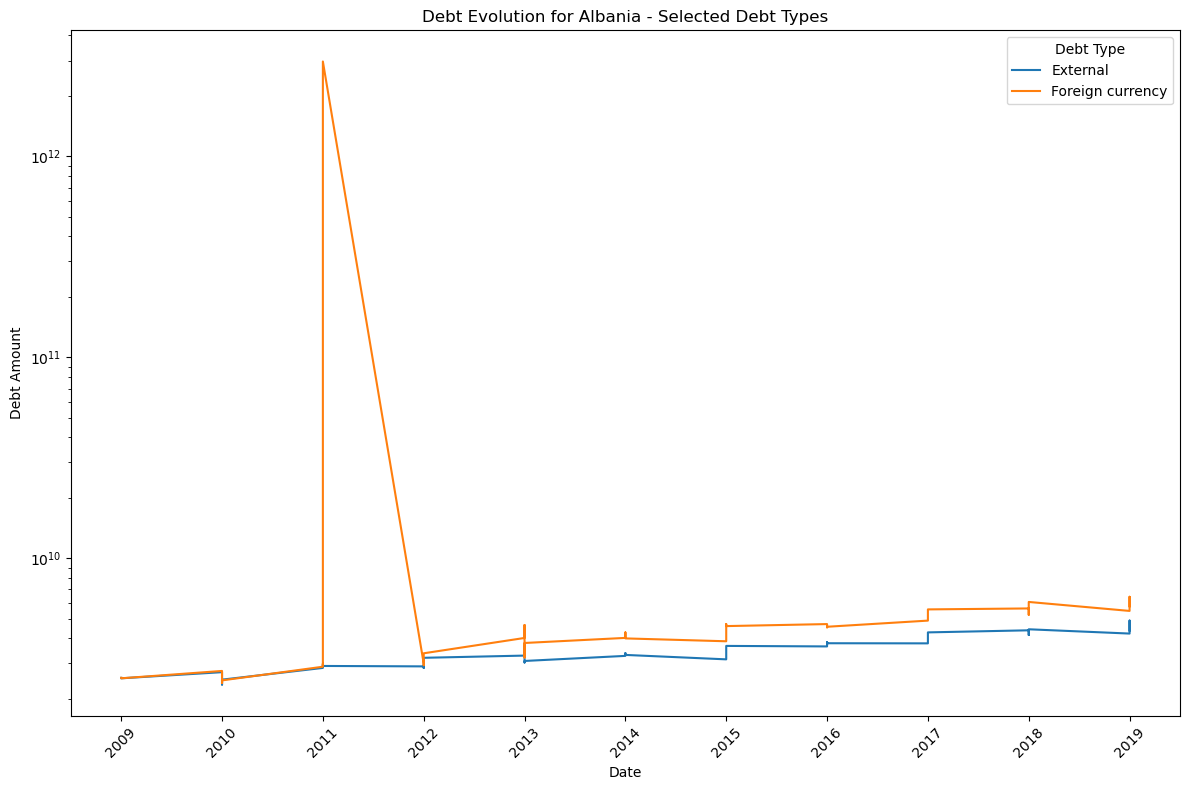

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multiple_debt_types_evolution_line_chart(df, country, debt_types):
    plt.figure(figsize=(12, 8))
    
    for debt_type in debt_types:
        df_filtered = df[(df['Country Name'] == country) & (df['Series Name'].str.contains(debt_type, case=False))]
        
        if df_filtered.empty:
            continue
        df_filtered = df_filtered.sort_values(by='Date')
        
        plt.plot(df_filtered['Date'], df_filtered['Debt_Amount'], label=debt_type.capitalize())
    
    plt.xlabel('Date')
    plt.ylabel('Debt Amount')
    plt.title(f'Debt Evolution for {country} - Selected Debt Types')
    plt.xticks(rotation=45)
    plt.legend(title='Debt Type')
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

country = 'Albania'
debt_types = ['internal', 'external', 'foreign currency']
plot_multiple_debt_types_evolution_line_chart(df_long, country, debt_types)


8.- Create a function that receives a list of countries and a list of types of debt, and draw a
box plot of debt.

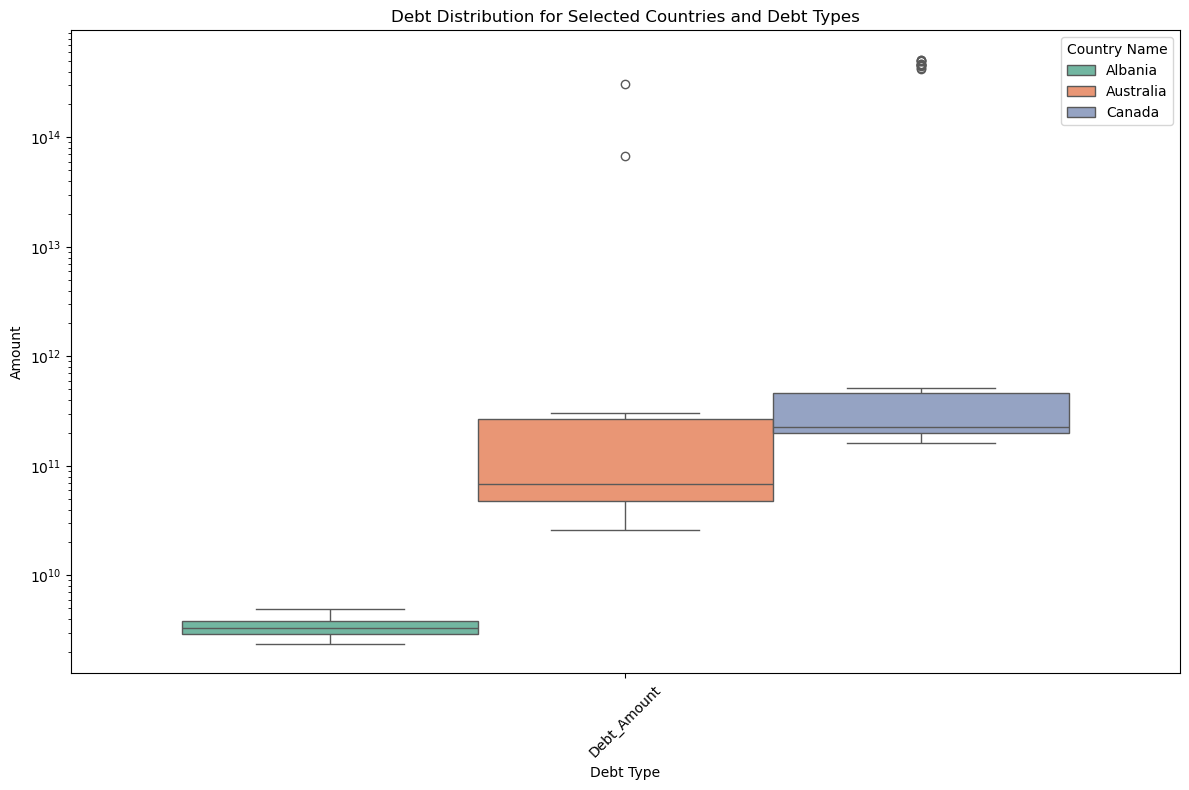

In [15]:
def plot_debt_box_plot(df, countries, debt_types):
    df_filtered = df[df['Country Name'].isin(countries) & df['Series Name'].str.contains('|'.join(debt_types), case=False)]
    
    df_melted = df_filtered.melt(id_vars=['Country Name', 'Date', 'Series Name'], 
                                 value_vars=['Debt_Amount'], 
                                 var_name='Debt Type', 
                                 value_name='Amount')
    
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Debt Type', y='Amount', hue='Country Name', data=df_melted, palette='Set2')
    plt.yscale('log')
    plt.title(f'Debt Distribution for Selected Countries and Debt Types')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
countries = ['Albania', 'Australia', 'Canada']
debt_types = ['internal', 'external']
plot_debt_box_plot(df_long, countries, debt_types)